#<font color = 'Orange'>Scraping page</font>
You need to scrape the phones with their price from: https://mobelix.com.mk/mk/mobilni-telefoni

The informations you need to extract are:


*   Phone brand: html tag (\<h5 class="mb-0">\)
*   Phone type: html tag (\<h3 class="h5 font-weight-normal">\)
*   Phone pruce: html tag (\<p class="h5 price">\)



# <font color='Orange'>Requirements specified for Web Scraping</font> (0.1 POINTS)


Import all libraries and modules that you are going to use.

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
import numpy as np
import pandas as pd
import requests
from datetime import date
from bs4 import BeautifulSoup
from IPython.display import HTML

import warnings
import random
requests.packages.urllib3.disable_warnings()
warnings.filterwarnings("ignore")

Mounted at /content/drive


# <font color = 'Orange'> Start the scraping by sending HTTP request</font> (0.3 POINTS)


 **Fetch a website's content - send request**

In [ ]:
mobelix_url = 'https://mobelix.com.mk/mk/mobilni-telefoni'
response = requests.get(mobelix_url)

**Get the response-status code and see:**
<li>If the code starts with a 2, it means the request was successful.



In [ ]:
print(response)

<Response [200]>


# <font color = 'orange'>Parse the HTML with BeautifulSoup</font> (0.3 POINTS)

Beautiful Soup is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. It commonly saves programmers hours or days of work.


**Parse using BeautifulSoap**




In [ ]:
html = BeautifulSoup(response.text, "html.parser")

**Print the HTML code that you get**

In [ ]:
print(html)

<!DOCTYPE html>

<html lang="en">
<head>
<!-- Required meta tags -->
<meta charset="utf-8"/>
<title>Мобилни телефони | Mobelix Premium Mobilara</title>
<meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
<meta content="Мобилни телефони | Mobelix Премиум Мобилара" name="title"/>
<meta content="Mobile Store I Service | Mobelix Premium Mobilara Skopje нуди најголем избор на премиум додатоци за мобилни телефони: маски за мобилни телефони, диспеј, полначи, полначи за кола, бежични полначи, power bank, bluetooth слушалки, usb кабли, фолии и стакла за дисплеј и др." name="description"/>
<meta content="mobilara, mobilara skopje, mobilni dodatoci, мобилни додатоци, полначи, бежични полначи, power bank, Bluetooth slusalki, maski za telefoni" name="keywords"/>
<meta content="Mobelix Премиум Мобилара" property="og:site_name">
<meta content="http://mobelix.com.mk/mk/mobilni-telefoni" property="og:url">
<meta content="Мобилни телефони | Mobelix Премиум Мобилара" p

# <font color='Orange'>Extracting data</font> (0.7 POINTS)

From the printed HTML code search for the data you need for building the dataset, by the classes that are given above in the html tags listed.



**Try to select the first element from your attributes. Find out from the html code what part do you need.**

In [ ]:
phones = []
for i in range(1, 22):
  phones_on_page = html.find_all('div', {'class': 'border border-0 bg-white rounded px-3 pb-3 pt-1 row mx-0 align-items-center'})

  for j in range(len(phones_on_page)):
    item = {}
    item['Brand'] = phones_on_page[j].select_one('.mb-0').text
    item['Model'] = phones_on_page[j].find('h3', class_='h5 font-weight-normal').text
    price = phones_on_page[j].find('p', class_='h5 price').find_all(text=True)
    item['Price'] = float(''.join([text for text in price if not text.parent.name == 'del']).split(' ')[0].replace(',', ''))
    phones.append(item)

  mobelix_url = 'https://mobelix.com.mk/mk/mobilni-telefoni' + f'?page={i}'
  response = requests.get(mobelix_url)
  html = BeautifulSoup(response.text, "html.parser")


**Print all lists that are containing the elements**

In [ ]:
print(phones)

[{'Brand': 'Blackberry', 'Model': 'Porsche Design P9981', 'Price': 19000.0}, {'Brand': 'Samsung', 'Model': 'Galaxy A03s 4/64GB', 'Price': 8300.0}, {'Brand': 'Samsung', 'Model': 'Galaxy A04s 3/32GB', 'Price': 8300.0}, {'Brand': 'Apple', 'Model': 'iPhone 14 Pro Max 128GB E-SIM', 'Price': 61500.0}, {'Brand': 'Apple', 'Model': 'iPhone 14 Pro 512GB', 'Price': 89200.0}, {'Brand': 'Apple', 'Model': 'iPhone 14 Pro Max 512GB', 'Price': 78100.0}, {'Brand': 'Apple', 'Model': 'iPhone 14 Pro Max 1TB', 'Price': 98400.0}, {'Brand': 'Apple', 'Model': 'iPhone 14 Pro 128GB E-SIM', 'Price': 55300.0}, {'Brand': 'Apple', 'Model': 'iPhone 13 Mini 256GB', 'Price': 46800.0}, {'Brand': 'Blackberry', 'Model': 'Porsche Design P9981', 'Price': 19000.0}, {'Brand': 'Samsung', 'Model': 'Galaxy A03s 4/64GB', 'Price': 8300.0}, {'Brand': 'Samsung', 'Model': 'Galaxy A04s 3/32GB', 'Price': 8300.0}, {'Brand': 'Apple', 'Model': 'iPhone 14 Pro Max 128GB E-SIM', 'Price': 61500.0}, {'Brand': 'Apple', 'Model': 'iPhone 14 Pro 5

# <font color='Orange'>Create a Pandas DataFrame</font> (0.1 POINTS)


**Create the DataFrame from the lists you get and name your *Columns***

In [ ]:
df = pd.DataFrame(phones)
df.head(5)

,Brand,Model,Price
0,Blackberry,Porsche Design P9981,19000.0
1,Samsung,Galaxy A03s 4/64GB,8300.0
2,Samsung,Galaxy A04s 3/32GB,8300.0
3,Apple,iPhone 14 Pro Max 128GB E-SIM,61500.0
4,Apple,iPhone 14 Pro 512GB,89200.0


**Print the dataset you obtain**

In [ ]:
df

,Brand,Model,Price
0,Blackberry,Porsche Design P9981,19000.0
1,Samsung,Galaxy A03s 4/64GB,8300.0
2,Samsung,Galaxy A04s 3/32GB,8300.0
3,Apple,iPhone 14 Pro Max 128GB E-SIM,61500.0
4,Apple,iPhone 14 Pro 512GB,89200.0
...,...,...,...
184,Xiaomi,Mi 11 Ultra 5G 12GB RAM/256GB,49200.0
185,Xiaomi,Xiaomi Poco X3 PRO 6GB RAM/128GB,15400.0
186,Xiaomi,Redmi Note 10 PRO MAX 6GB RAM/128GB,16900.0
187,One Plus,9 5G 8GB RAM/128GB,30800.0


In [ ]:
import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['Price'], **{})
chart

#<font color='orange'>EDA</font> (0.2 POINTS)

## <font color='Orange'>Find statistic elements for the prices</font>
Like mean, median,  standard deviation, minimum, maximum

In [ ]:
print(df['Price'].mean())
print(df['Price'].median())
print(df['Price'].max())
print(df['Price'].min())
print(df['Price'].std())

NameError: ignored

# <font color = 'Orange'>Data visualization </font> (0.3 POINTS)

Make a histogram & bar chart for the price values

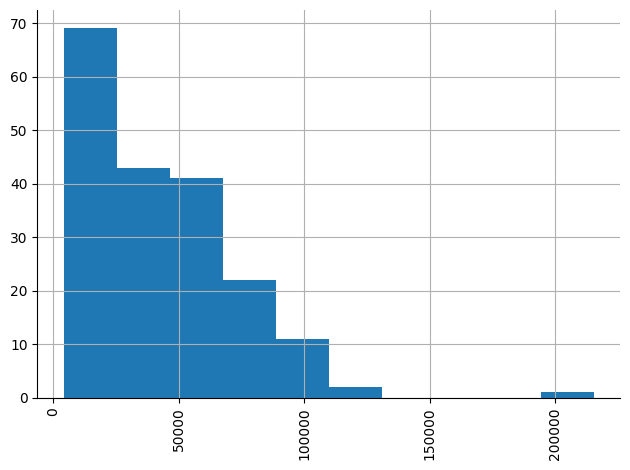

In [ ]:
import matplotlib.pyplot as plt
df['Price'].hist()
plt.xticks(rotation=90)

plt.gca().spines[['top', 'right',]].set_visible(False)
plt.tight_layout()
